In [99]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
from matplotlib.colors import LogNorm

from utils import distance
from utils import CommonFunctions as CF

from galib import models as HM

from seaborn import hls_palette

import importlib
importlib.reload(distance)
importlib.reload(CF)

import networkx as nx

from rpy2 import robjects

# Network generation

## 1. Hierarchical modular

In [2]:
### Parameters
def myHMN(nlevels, m0=2, bsize=2, prob=1/4, alfa=4, p=1, verbose=False):
    '''
    m0 = size of initial moduli
    s = number of levels
    b = number of moduli clustered at each level
    pl = alfa * p**l = level-dependent wiring probabilities
    random -> whether initial moduli are fully-connected or random
    '''
    
    ### T0D0: CONVERT TO SPARSE MATRIX
    ### TODO: IF P-LEVEL EQUAL 1, ADD BY DEFAULT
    n_blocks = bsize**nlevels
    N = m0 * n_blocks
    print('size:', N)
    
    block_size_level = m0* bsize**np.arange(nlevels)
    n_blocks_level = N // block_size_level
    p_level = alfa * prob**np.arange(1,nlevels+1)
    n_link_level =  (p_level*block_size_level**2).astype(int)
    
    if verbose:
        print('block_size_level:', block_size_level)
        print('n_blocks_level:', n_blocks_level)
        print('n_link_level:', n_link_level)
    
    ### Create empty adj
    adj = np.zeros((N,N))
    
    ### Create initial blocks
    if p<1:
        template = np.random.rand(m0,m0)
        # Select the entries with value <= p
        template = np.where(template <= p, 1, 0).astype(int)
    elif p==1:
        template = np.ones((m0,m0))
    else:
        raise ValueError('p must be 0<p<1.')
    
    # Remove self-loops
    template = template - np.eye(m0)
        
    # Add
    idx = np.arange(n_blocks) * m0
    for i in idx:
        adj[i:i+m0,i:i+m0] = template
        
    ### Loop over levels
    print('Loop over levels...')
    for level in range(nlevels):
        
        block_size = block_size_level[level]
        n_link_to_add = n_link_level[level]
        
        if verbose:
            print(f'[*] LEVEL {level+1}')
            print('block size:', block_size, ', n link to add:', n_link_to_add)
        
        if n_link_to_add>block_size**2:
            if verbose: print('WARNING: n link to add is larger than block size...')
            n_link_to_add = block_size**2
        
        # Loop over couple of blocks
        for i in range(n_blocks_level[level]-1):
            idx_i = np.arange(block_size) + i*block_size
            idx_j = idx_i + block_size
                
            new_links = np.random.choice(np.arange(block_size**2), replace=False, size=n_link_to_add)
                
            new_i = [idx_i[x%block_size] for x in new_links]
            new_j = [idx_j[x//block_size] for x in new_links]
                
            adj[new_i,new_j] = 1
            adj[new_j,new_i] = 1
                
    return adj

In [3]:
adj = myHMN(nlevels=3, prob=1/4, alfa=1, verbose=True, m0=16, p=1)

size: 128
block_size_level: [16 32 64]
n_blocks_level: [8 4 2]
n_link_level: [64 64 64]
Loop over levels...
[*] LEVEL 1
block size: 16 , n link to add: 64
[*] LEVEL 2
block size: 32 , n link to add: 64
[*] LEVEL 3
block size: 64 , n link to add: 64


In [4]:
HMshape = [2,2,32]
avklist = [1,2,20]
adj = HM.HMRandomGraph(HMshape, avklist)

In [5]:
HMshape = [2,2,2,16]
avklist = [1,2,6,13]
adj2 = HM.HMRandomGraph(HMshape, avklist)

In [9]:
np.save(f'networks/levels_{3}_p_{0.25}_alfa_{1}_m0_{16}.npy', adj)

In [6]:
G = nx.from_numpy_array(adj)
print(nx.is_connected(G))

True


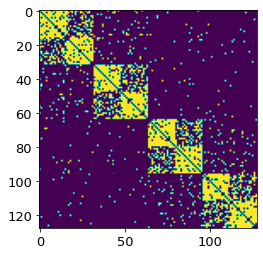

In [9]:
plt.imshow(adj2)
plt.show()

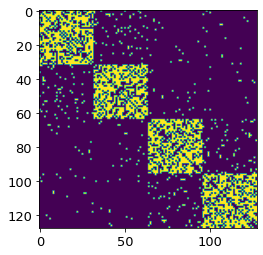

In [7]:
plt.imshow(adj)
plt.show()

In [9]:
G = nx.from_numpy_array(adj)
print(nx.is_connected(G))

True


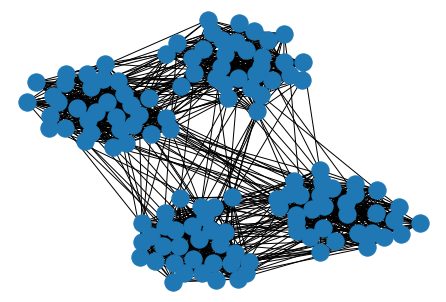

In [10]:
nx.draw(G)

## 2. HM with core-periphery structure

In [171]:
from galib import models as HM

In [171]:
HMshape = [2,4,16]
avklist = [1,3,13]
gammalist = [1.5,1.5,100]

cp = HM.HMCentralisedGraph(HMshape, avklist, gammalist)

In [191]:
HMshape = [2,2,2,16]
avklist = [1,2,6,13]
gammalist = [2,2,2,100]

cp2 = HM.HMCentralisedGraph(HMshape, avklist, gammalist)

In [172]:
HMshape = [2,4,16]
avklist = [1,3,13]
gammalist = [2,2,100]

cp3 = HM.HMCentralisedGraph(HMshape, avklist, gammalist)

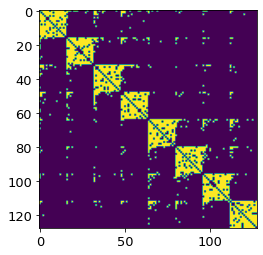

In [172]:
plt.imshow(cp)
plt.show()

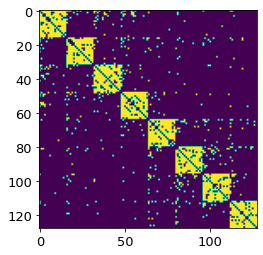

In [47]:
plt.imshow(cp3)
plt.show()

True


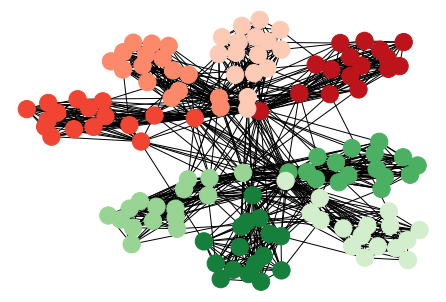

In [177]:
G = nx.from_numpy_array(cp)
print(nx.is_connected(G))
nx.draw(G, node_color=cs)

True


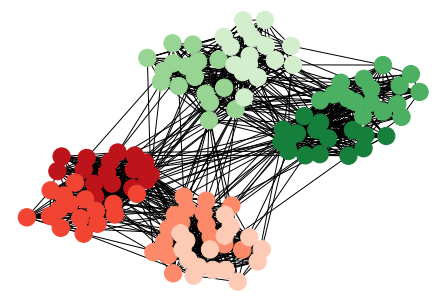

In [192]:
G = nx.from_numpy_array(cp2)
print(nx.is_connected(G))
nx.draw(G, node_color=cs)

In [11]:
cp3 = np.load('networks/cp.npy')

In [127]:
from matplotlib.cm import get_cmap
offs = 2
reds = get_cmap('Reds_r', HMshape[1]+offs)
blues = get_cmap('Greens_r', HMshape[1]+offs)

c1 = [ reds(i) for i in np.arange(1,HMshape[1]+1)]
c2 = [ blues(i) for i in np.arange(1,HMshape[1]+1)]

c1 = np.repeat(c1, HMshape[2], axis=0)
c2 = np.repeat(c2, HMshape[2], axis=0)

cs = np.concatenate([c1, c2])

True


ValueError: 'c' argument has 8 elements, which is inconsistent with 'x' and 'y' with size 128.

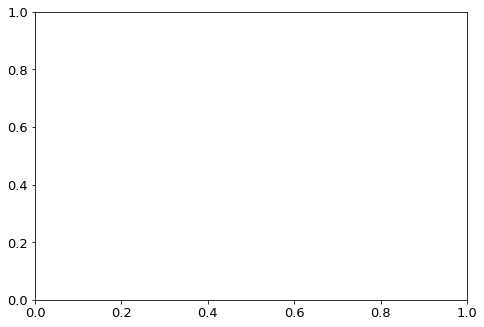

In [14]:
G3 = nx.from_numpy_array(cp3)
print(nx.is_connected(G3))
nx.draw(G3,node_color=cs)

## - Diffusion distance

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


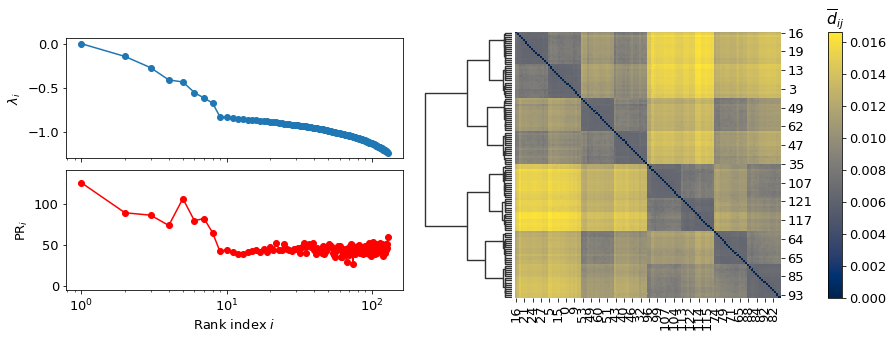

In [7]:
res_gn = distance.diffusion_distance(adj, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


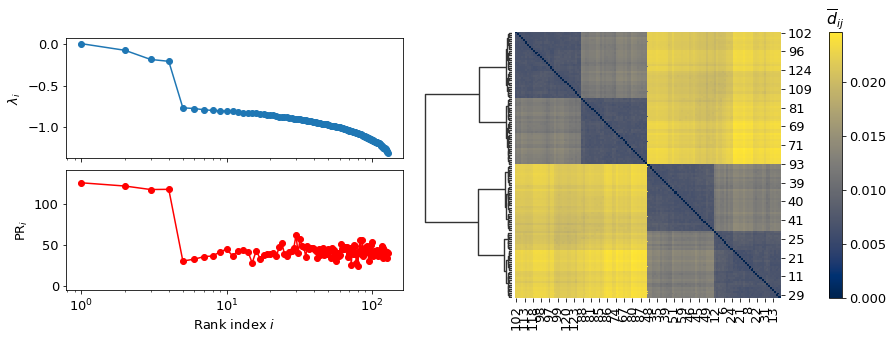

In [227]:
res_gn = distance.diffusion_distance(adj, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


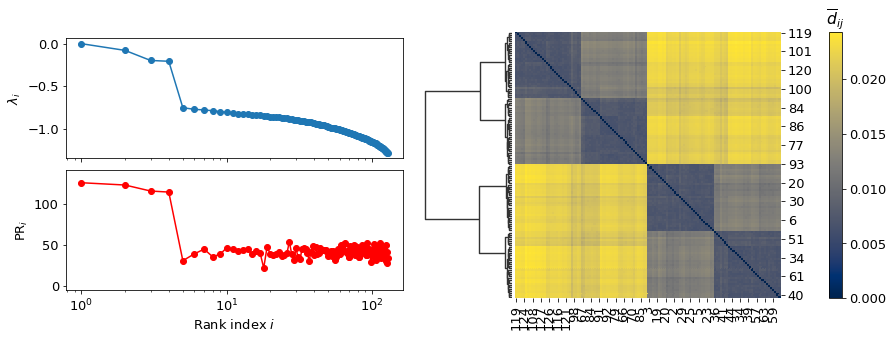

In [8]:
res_gn = distance.diffusion_distance(adj, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


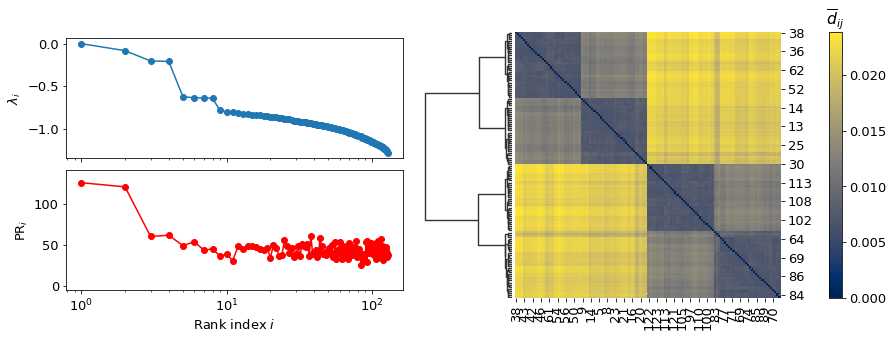

In [10]:
res_gn = distance.diffusion_distance(adj2, args=[1, 1], name=None)

In [27]:
from scipy.linalg import eig

N = 128
L = np.eye(N) - adj2 / np.sum(adj2, axis=1)[:,None]

eigvals, eigl, eigr = eig(L, left=True, right=True)
eigvals = eigvals.real
print(eigvals.max(), eigvals.min())

lmax, lmin = eigvals.max(), eigvals.min()

1.2838610021487924 5.551115123125783e-17


In [39]:
eigvals

array([5.55111512e-17, 8.24412289e-02, 2.08936439e-01, 2.03296632e-01,
       6.23130351e-01, 6.37425136e-01, 6.39699049e-01, 6.42442118e-01,
       1.28386100e+00, 1.27751903e+00, 7.85735055e-01, 1.26664584e+00,
       1.25561569e+00, 1.25201451e+00, 1.24500260e+00, 8.04238953e-01,
       8.09449903e-01, 8.14133158e-01, 8.23457633e-01, 1.23969213e+00,
       8.33350369e-01, 8.37148317e-01, 1.23418957e+00, 1.22573552e+00,
       8.43802879e-01, 8.43128958e-01, 1.22086152e+00, 8.49237930e-01,
       1.22149266e+00, 1.21741787e+00, 1.20996409e+00, 8.56626715e-01,
       8.57746601e-01, 1.20651735e+00, 1.20423932e+00, 8.65560520e-01,
       8.67984827e-01, 1.19880954e+00, 1.19638448e+00, 8.75507972e-01,
       1.19501344e+00, 1.19125088e+00, 8.79233169e-01, 8.81433605e-01,
       1.18248626e+00, 1.18018640e+00, 8.83721856e-01, 1.17848033e+00,
       8.89464328e-01, 1.17535280e+00, 1.17388192e+00, 8.95512152e-01,
       1.16975729e+00, 1.16492976e+00, 9.06194420e-01, 1.16240440e+00,
      

In [84]:
avg_dd = res_gn[1]
avg_dd = np.insert(avg_dd, 0, np.sqrt(2))

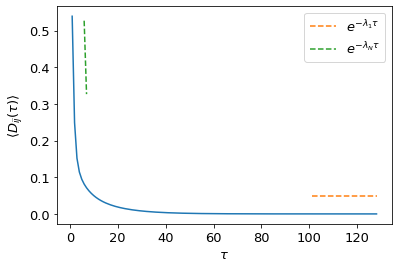

In [86]:
tt = np.arange(len(res_gn[1])) +1
tmax = 2
tmin = 100

plt.plot(tt, res_gn[1])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\langle D_{ij}(\tau) \rangle$')
#plt.xscale('log')

plt.plot(tt[tmin:], np.exp(-lmin*tt[tmin:]) -0.95, '--', label=r'$e^{-\lambda_1 \tau}$')
plt.plot(tt[:tmax]+5, np.exp(-lmax*tt[:tmax]) +0.25, '--', label=r'$e^{-\lambda_N \tau}$')

plt.legend()
plt.show()

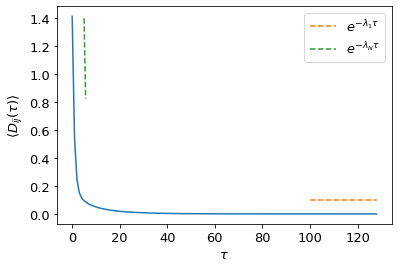

In [98]:
tt = np.arange(len(avg_dd))
tmax = 2
tmin = 100

plt.plot(tt, avg_dd)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\langle D_{ij}(\tau) \rangle$')
#plt.xscale('log')

plt.plot(tt[tmin:], np.exp(-lmin*tt[tmin:]) -0.9, '--', label=r'$e^{-\lambda_1 \tau}$')
plt.plot(tt[:tmax]/1.5+5, np.exp(-lmax*tt[:tmax]/1.5) +0.4, '--', label=r'$e^{-\lambda_N \tau}$')

plt.legend()
plt.show()

In [19]:
res_gn[1][0]

0.5391231564985401

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


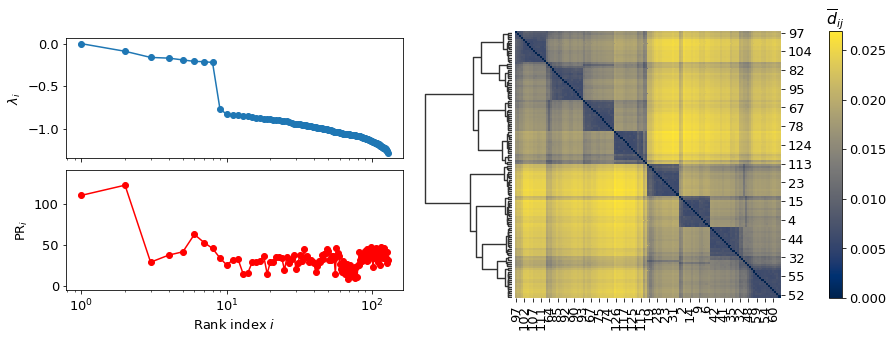

In [181]:
res_gn = distance.diffusion_distance(cp, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


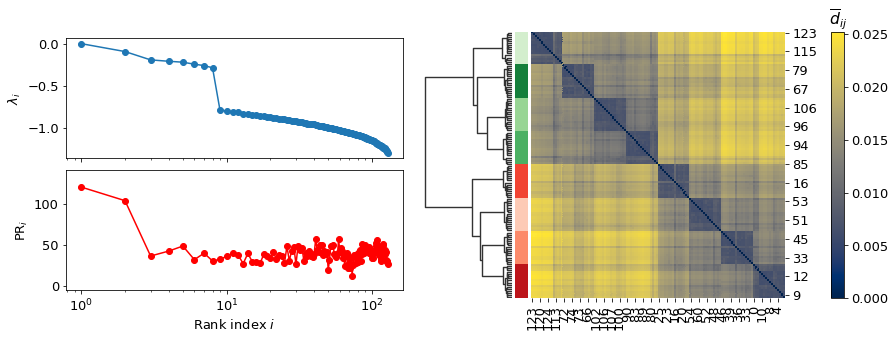

In [166]:
res_gn = distance.diffusion_distance(cp3, args=[1, 1], name=None, cs=cs)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


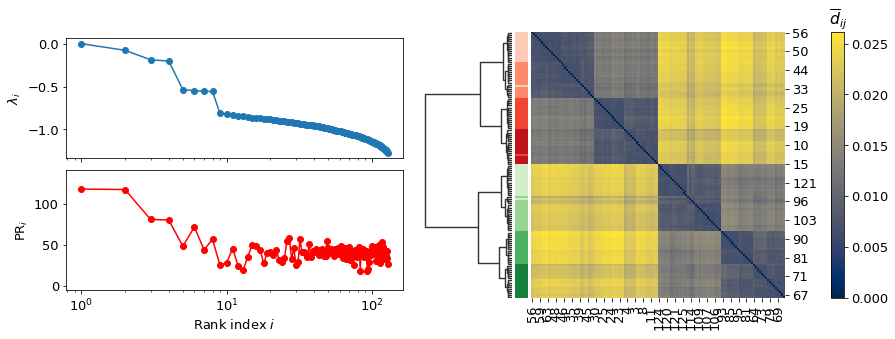

In [193]:
res_gn = distance.diffusion_distance(cp2, args=[1, 1], name=None, cs=cs)

## 3. LFR

True
n_comms: 4


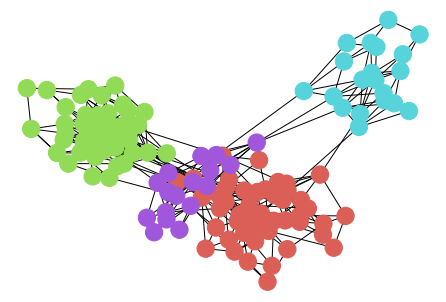

In [144]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.08
G = nx.LFR_benchmark_graph(n, tau1, tau2, mu, min_degree=3, min_community=15, max_community=120, seed=10)
G.remove_edges_from(nx.selfloop_edges(G))
print(nx.is_connected(G))
lfr = nx.to_numpy_array(G)

### Get communities
comms = []

for i in range(N):
    tmp = G.nodes[i]['community']
    
    if tmp not in comms:
        comms.append(tmp)
        
print('n_comms:', len(comms))

### Reorder nodes
lfr = nx.to_numpy_array(G)
sizes = [len(list(i)) for i in comms]
comms = [list(i) for i in comms]
comms = np.concatenate(comms)
lfr = lfr[:,comms][comms]
comms = np.concatenate([[val]*size for val, size in enumerate(sizes)])

G = nx.from_numpy_array(lfr)
palette = hls_palette(len(np.unique(comms)))
row_colors = [palette[i] for i in comms]
nx.draw(G, node_color=row_colors)

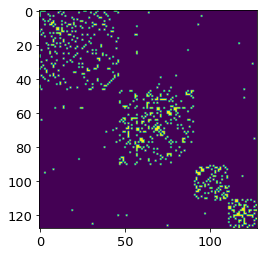

In [145]:
plt.imshow(mat)
plt.show()

# Neuronal dynamics

## 1. No self-interaction

In [15]:
gs = [0.3, 0.05, 0.02]
params = [[1,0,g] for g in gs]

In [20]:
N = 128

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.3]


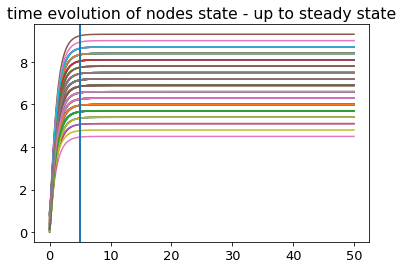

[1, 0, 0.3]
Normalizing jacobian - $\lambda_{max}=$1.000083735682593
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


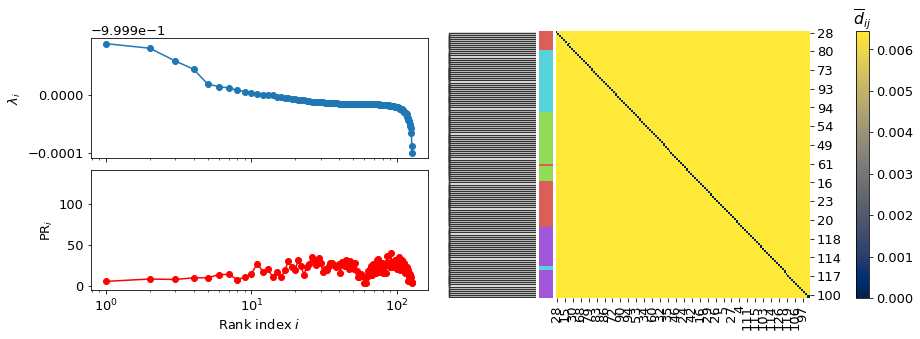

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.05]


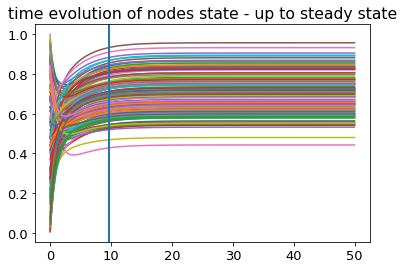

[1, 0, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.2108307326006855
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


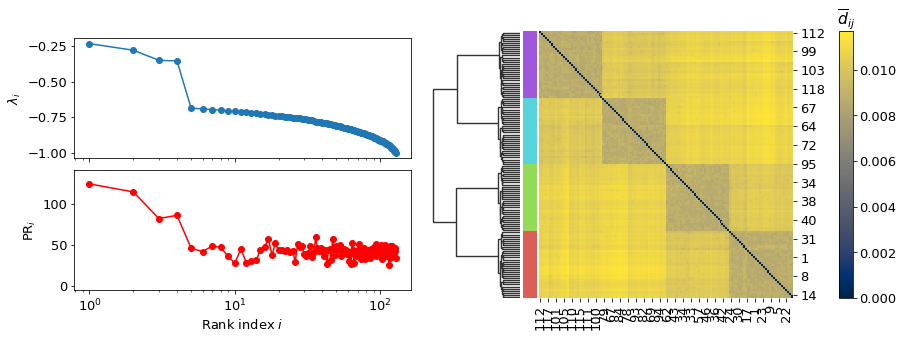

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.02]


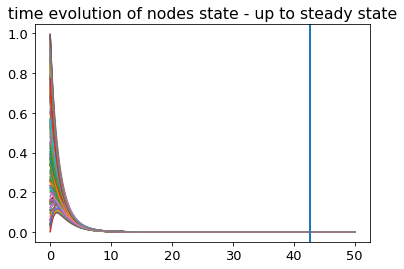

[1, 0, 0.02]
Normalizing jacobian - $\lambda_{max}=$1.1322550147438621
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


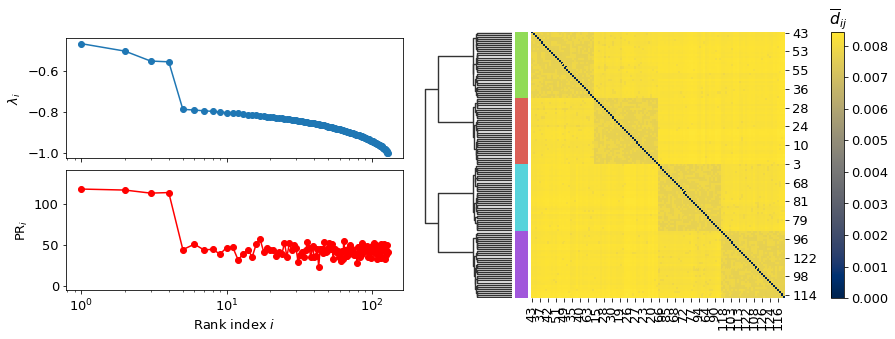

In [21]:
for param in params:
    res = distance.jacobian_distance(adj, 'Neuronal', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))

## 2. Adding self-interaction

In [22]:
ss = [2, 1, 0.01, -0.1, -1]
params = [[1,s,0.05] for s in ss]

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 2, 0.05]


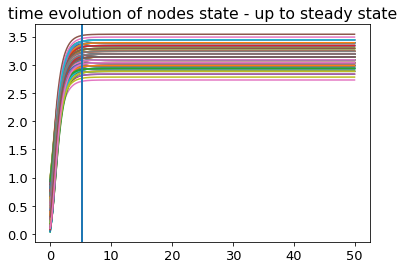

[1, 2, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9934792353390448
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


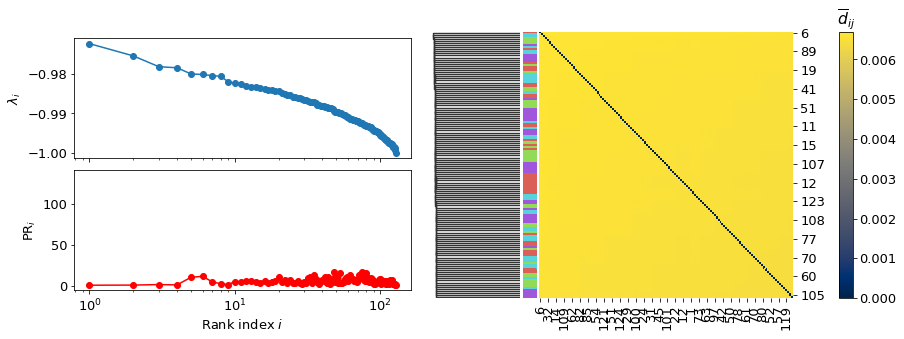

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 1, 0.05]


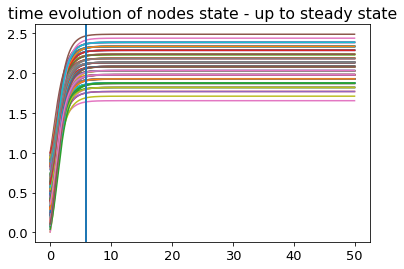

[1, 1, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9755212588390813
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


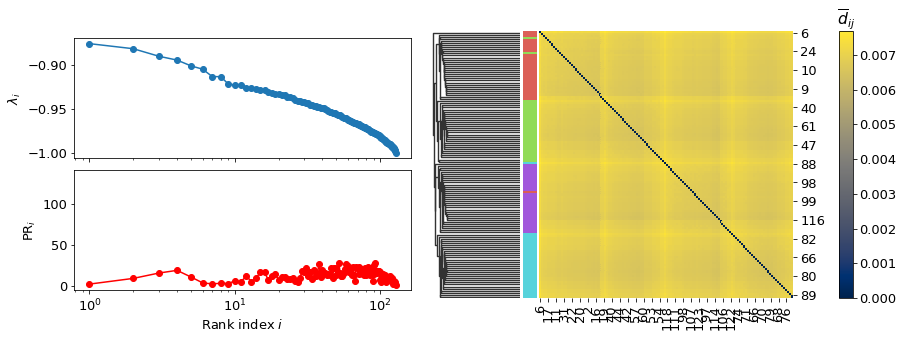

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.05]


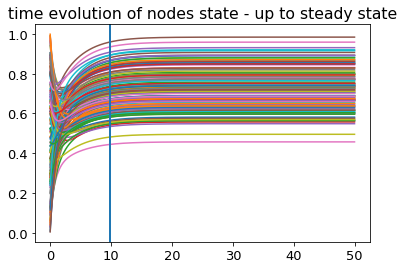

[1, 0.01, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.1993852165745265
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


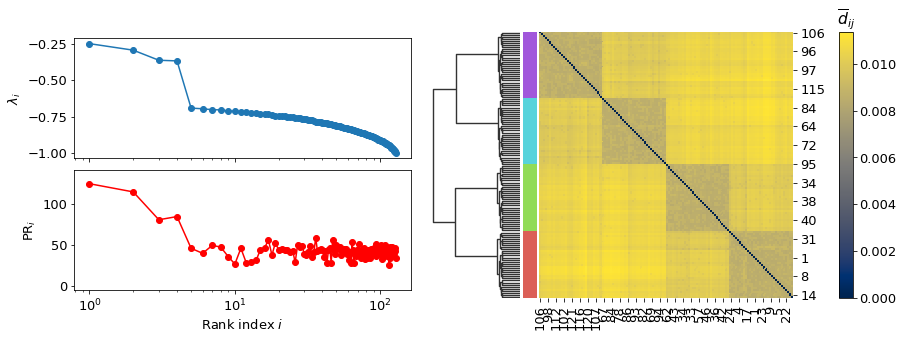

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, -0.1, 0.05]


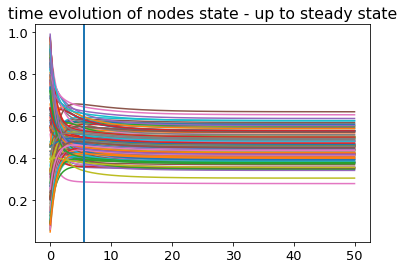

[1, -0.1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.3536074178146877
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


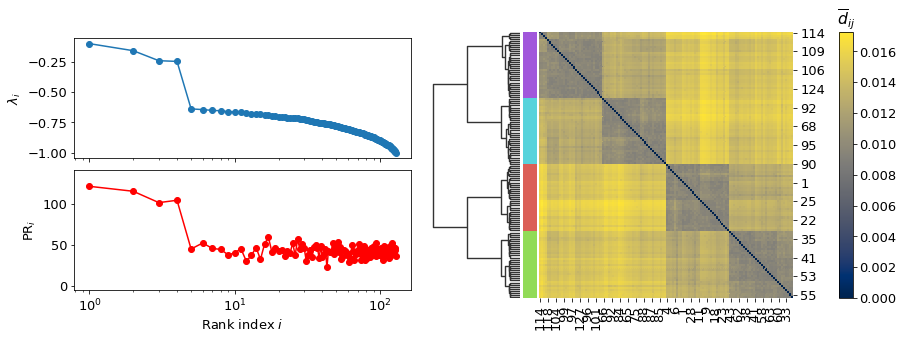

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, -1, 0.05]


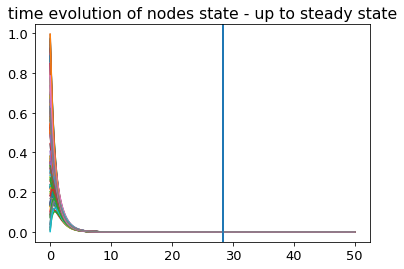

[1, -1, 0.05]
Normalizing jacobian - $\lambda_{max}=$2.3306375368596535
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


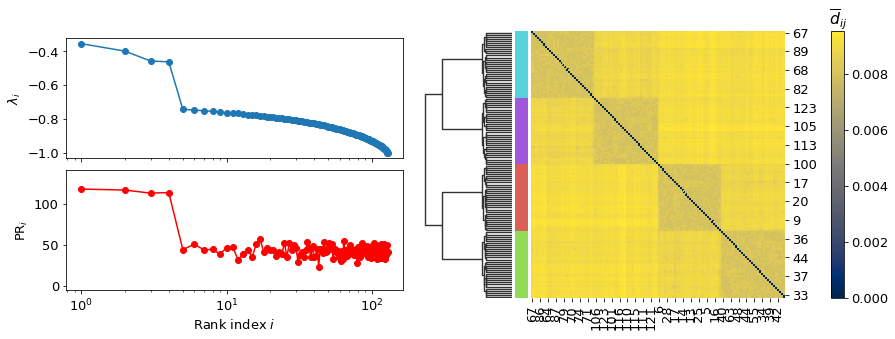

In [25]:
ress = []

for param in params:
    res = distance.jacobian_distance(adj, 'Neuronal', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))
    ress.append(res)

# Using other networks - cp3

True


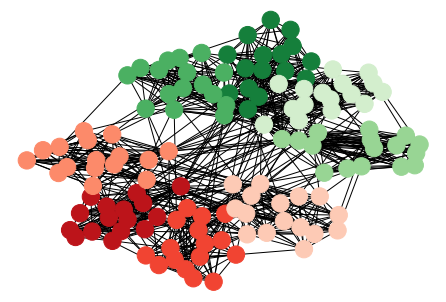

In [176]:
G3 = nx.from_numpy_array(cp3)
print(nx.is_connected(G3))
nx.draw(G3,node_color=cs) #,pos=nx.random_layout(G)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


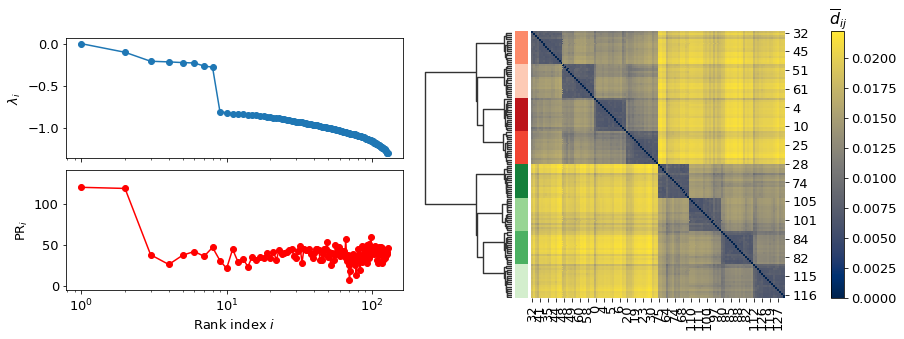

In [177]:
res_gn = distance.diffusion_distance(cp3, args=[1, 1], name=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 1.0]


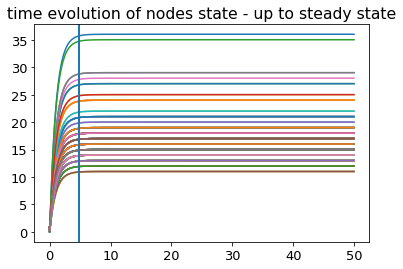

[1, 0.01, 1.0]
Normalizing jacobian - $\lambda_{max}=$1.0000000010827834
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


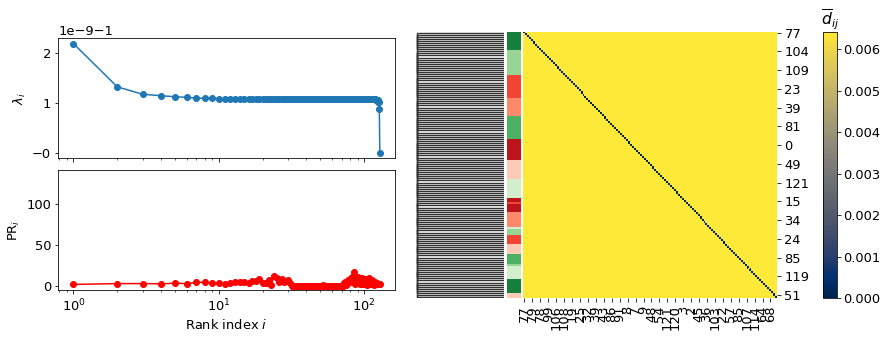

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.8]


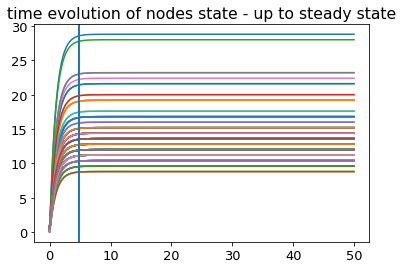

[1, 0.01, 0.8]
Normalizing jacobian - $\lambda_{max}=$1.0000000703882754
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


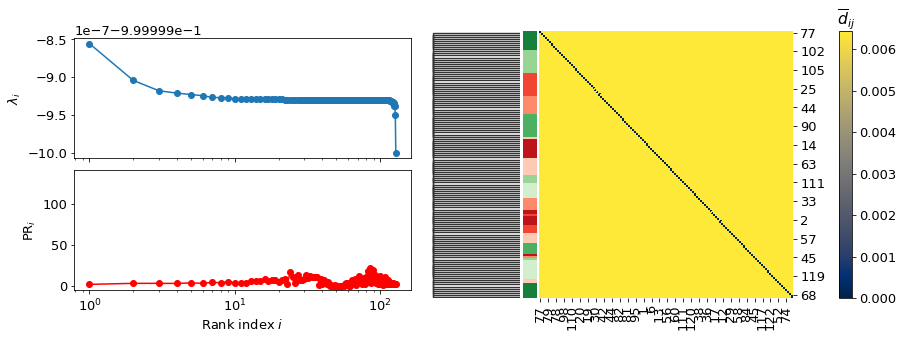

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.5]


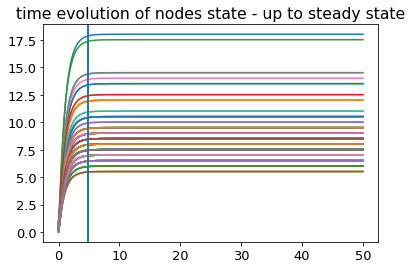

[1, 0.01, 0.5]
Normalizing jacobian - $\lambda_{max}=$1.0000322411273277
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


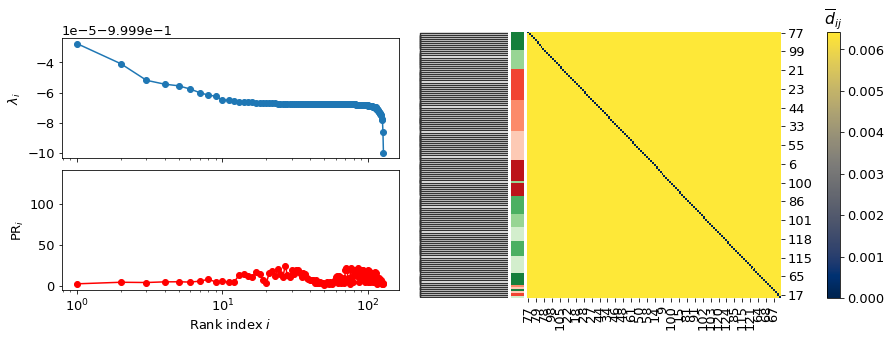

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.3]


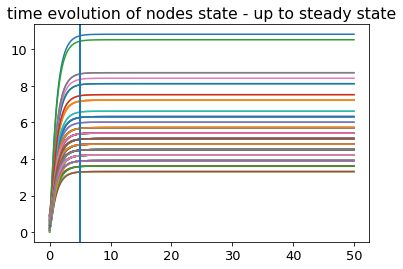

[1, 0.01, 0.3]
Normalizing jacobian - $\lambda_{max}=$1.0016252407748998
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


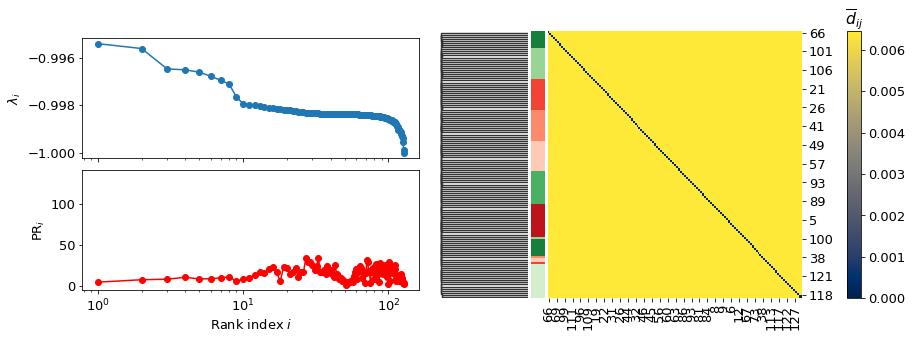

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.1]


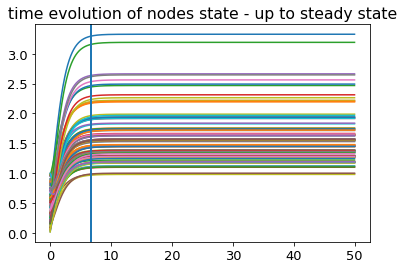

[1, 0.01, 0.1]
Normalizing jacobian - $\lambda_{max}=$1.0927931458288658
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


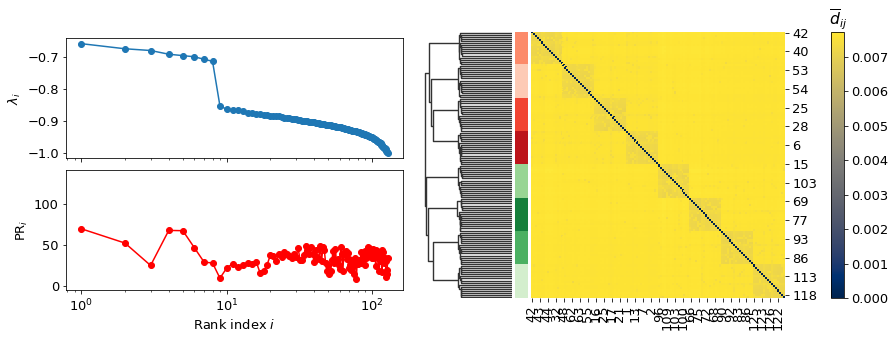

In [180]:
params = [1., 0.8, 0.5, 0.3, 0.1]
params = [[1,0.01,i] for i in params]

for param in params:
    res = distance.jacobian_distance(cp3, 'Neuronal', norm=True, args=param, name=None, title=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.0, 0.25]


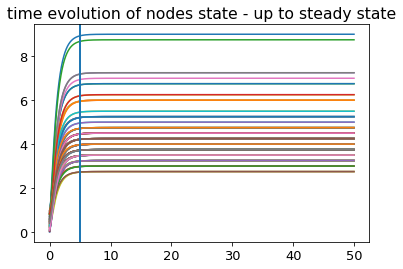

[1, 0.0, 0.25]
Normalizing jacobian - $\lambda_{max}=$1.0045641976466135
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


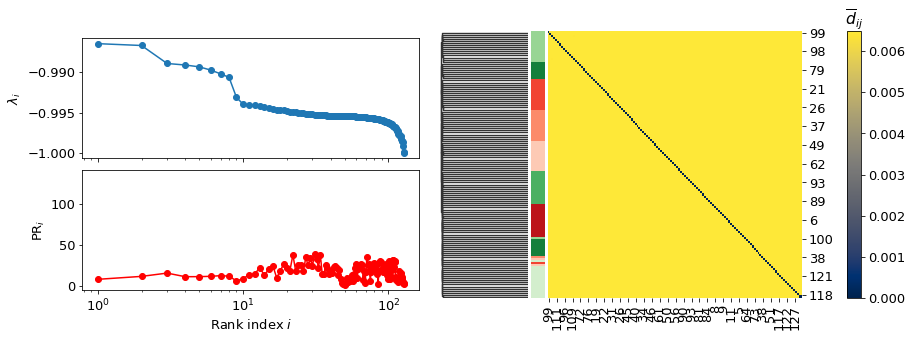

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.0, 0.2]


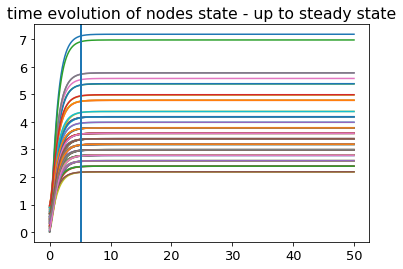

[1, 0.0, 0.2]
Normalizing jacobian - $\lambda_{max}=$1.0129342691754946
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


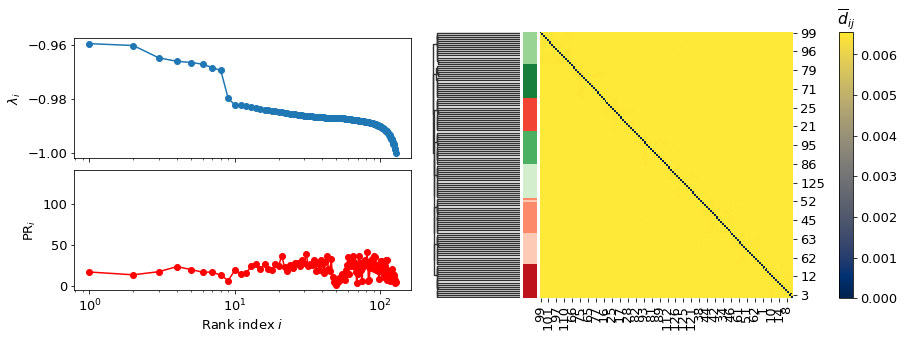

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.0, 0.15]


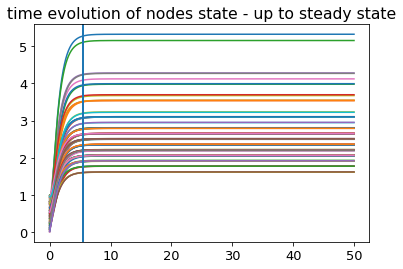

[1, 0.0, 0.15]
Normalizing jacobian - $\lambda_{max}=$1.035394283233274
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


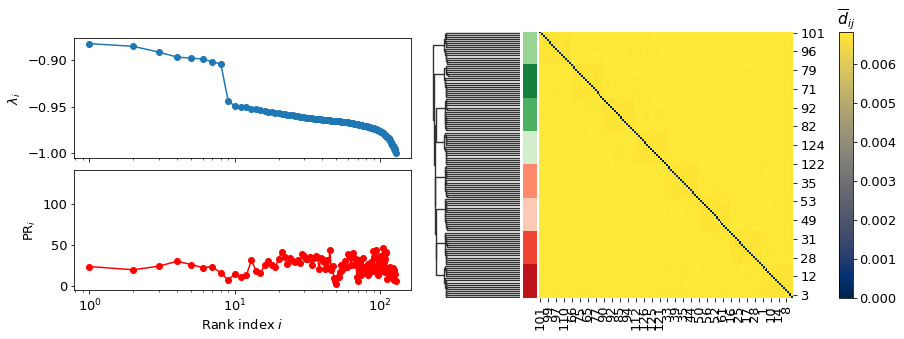

In [182]:
params = [0.25, 0.2, 0.15]
params = [[1,0.0,i] for i in params]

for param in params:
    res = distance.jacobian_distance(cp3, 'Neuronal', norm=True, args=param, name=None, title=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


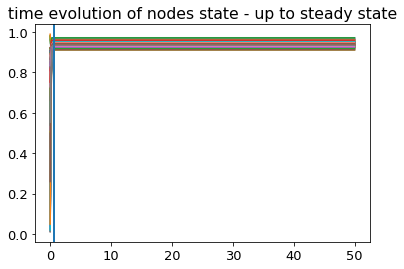

[1, 1]
Normalizing jacobian - $\lambda_{max}=$34.97798114952002
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


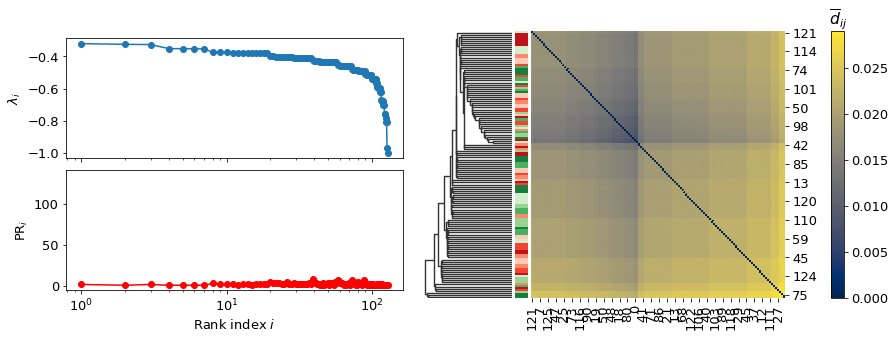

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.7]


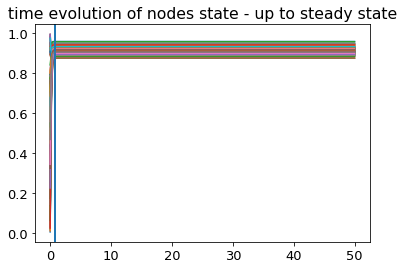

[1, 0.7]
Normalizing jacobian - $\lambda_{max}=$24.180406649890507
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


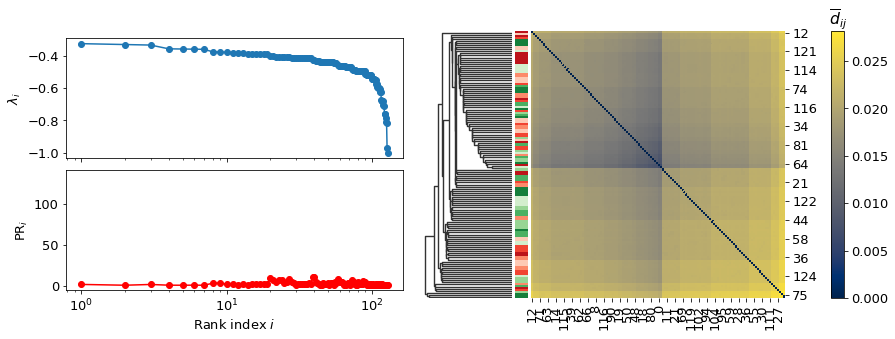

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.03]


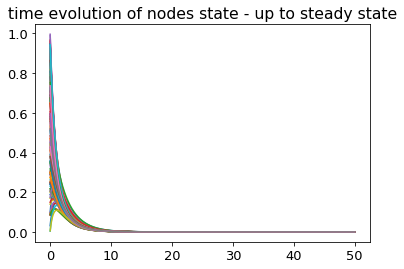

[1, 0.03]
Normalizing jacobian - $\lambda_{max}=$1.1818033441560747
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


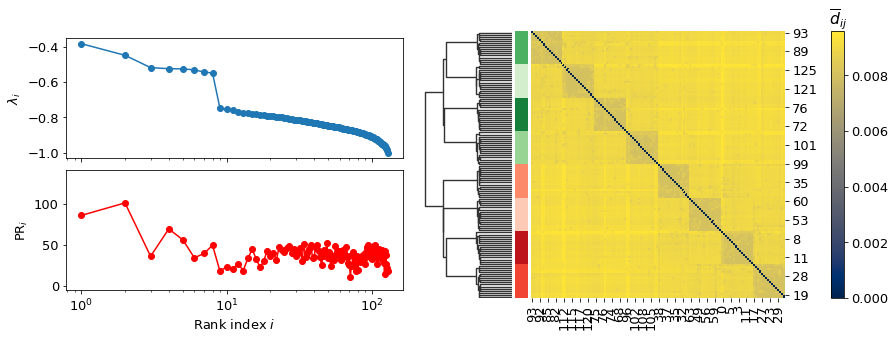

In [185]:
params = [1, 0.7, 0.03]
params = [[1,i] for i in params]

for param in params:
    res = distance.jacobian_distance(cp3, 'Epidemics', norm=True, args=param, name=None, title=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.08]


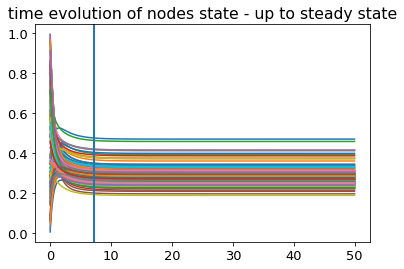

[1, 0.08]
Normalizing jacobian - $\lambda_{max}=$2.009320564634517
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


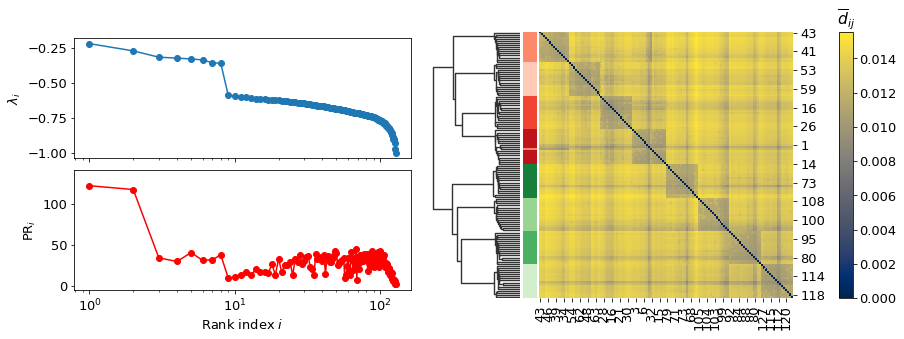

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.05]


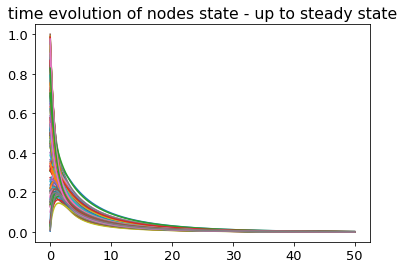

[1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.3038196984429207
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


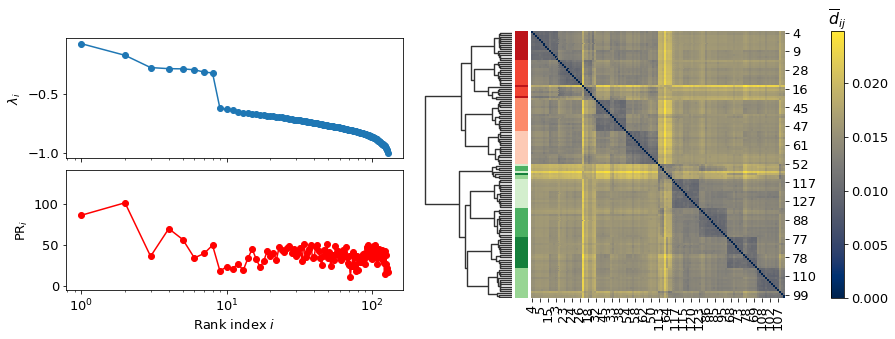

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.03]


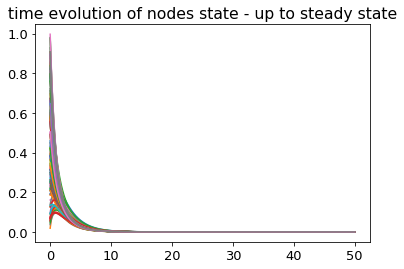

[1, 0.03]
Normalizing jacobian - $\lambda_{max}=$1.1818033441584337
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


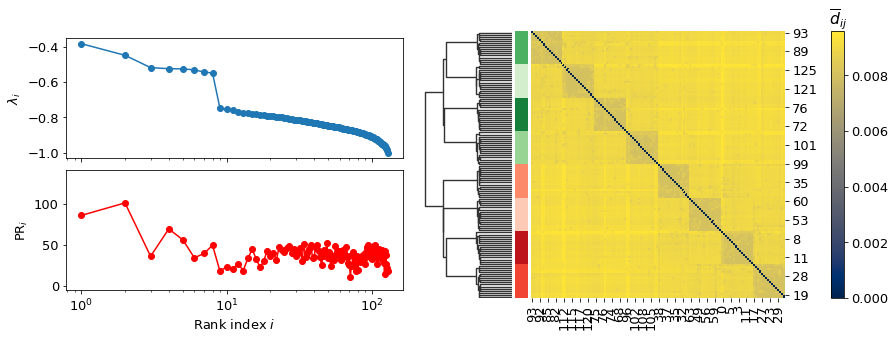

In [184]:
params = [0.08, 0.05, 0.03]
params = [[1,i] for i in params]

for param in params:
    res = distance.jacobian_distance(cp3, 'Epidemics', norm=True, args=param, name=None, title=None, cs=cs)

# Using other networks - LFR

True


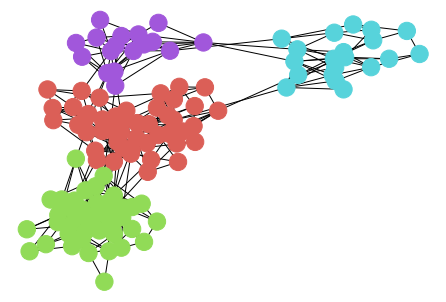

In [146]:
G = nx.from_numpy_array(lfr)
print(nx.is_connected(G))
nx.draw(G, node_color=row_colors) #,pos=nx.random_layout(G)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


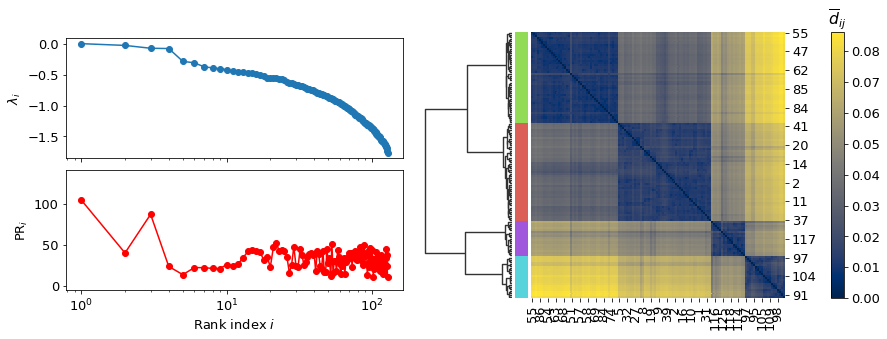

In [149]:
res_gn = distance.diffusion_distance(lfr, args=[1, 1], name=None, comms=comms)

JACOBIAN DISTANCE
Dynamics: NoisyVM
[0.0, 1, 1.0]


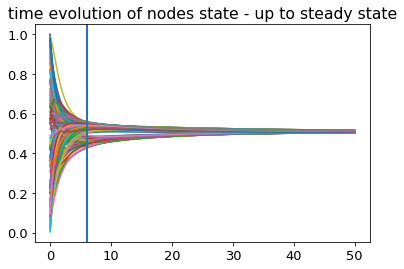

[0.0, 1, 1.0]
Normalizing jacobian - $\lambda_{max}=$1.762694064012662
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


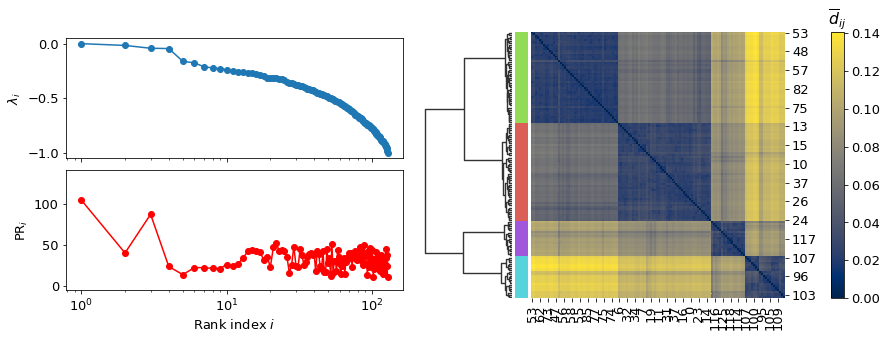

JACOBIAN DISTANCE
Dynamics: NoisyVM
[0.0, 2, 1.0]


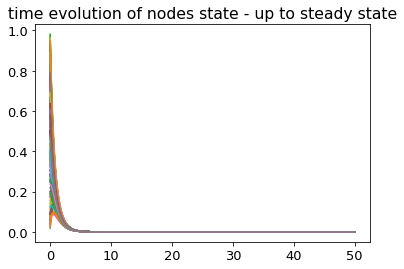

[0.0, 2, 1.0]
Normalizing jacobian - $\lambda_{max}=$2.7626940640126696
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


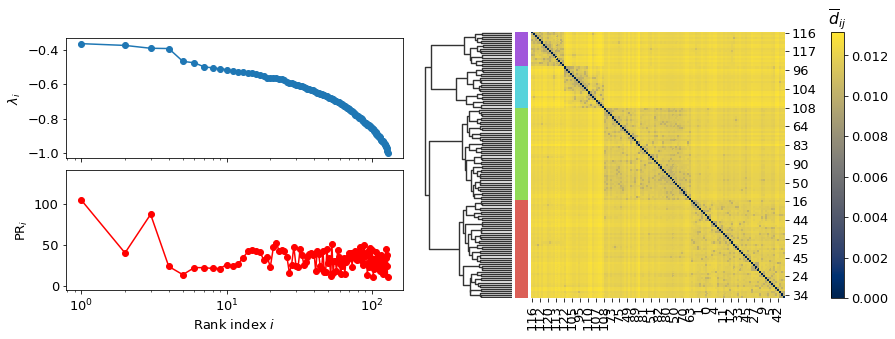

JACOBIAN DISTANCE
Dynamics: NoisyVM
[0.0, 3, 1.0]


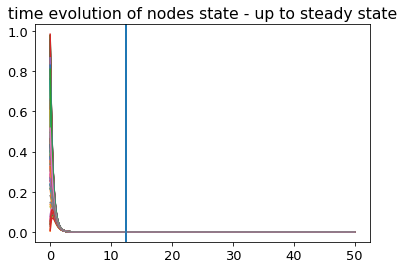

[0.0, 3, 1.0]
Normalizing jacobian - $\lambda_{max}=$3.7626940640126594
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


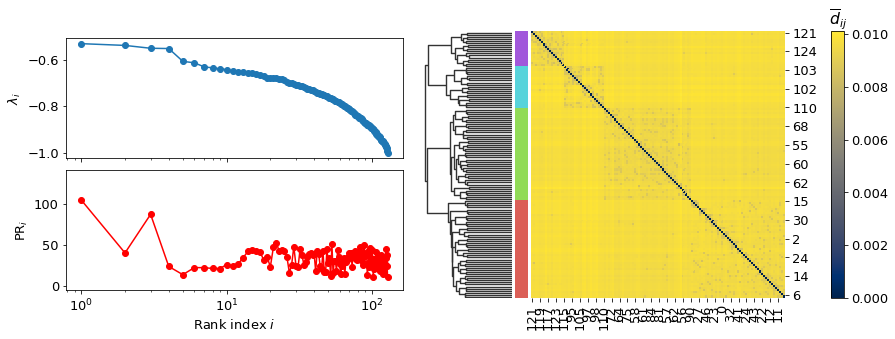

In [155]:
params = [1, 2, 3]
params = [[0.,i,1.] for i in params]

for param in params:
    res = distance.jacobian_distance(lfr, 'NoisyVM', norm=True, args=param, name=None, title=None, comms=comms)

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


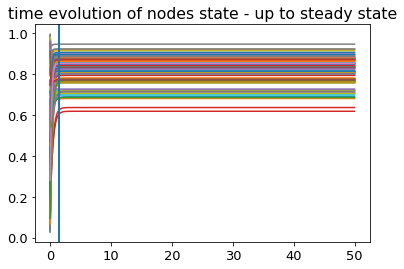

[1, 1]
Normalizing jacobian - $\lambda_{max}=$18.79670801973915
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


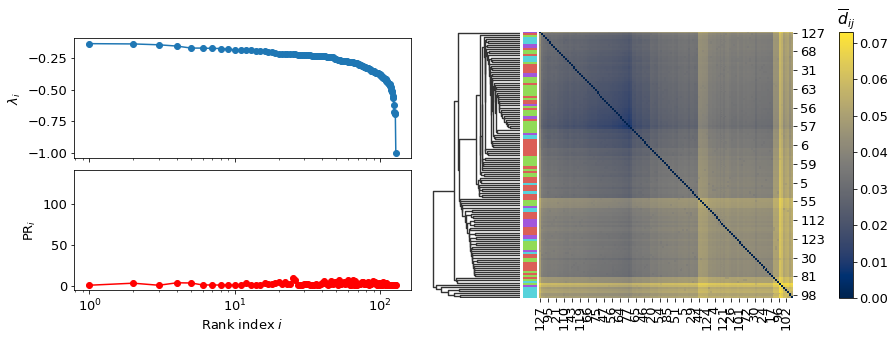

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.5]


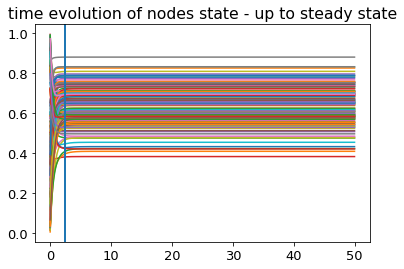

[1, 0.5]
Normalizing jacobian - $\lambda_{max}=$8.457615626006625
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


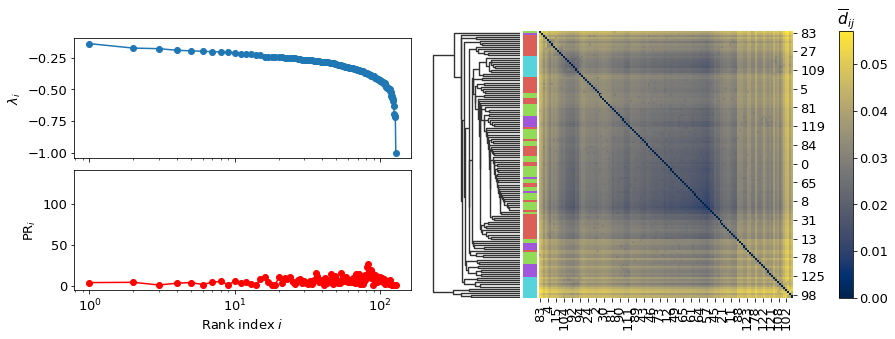

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.1]


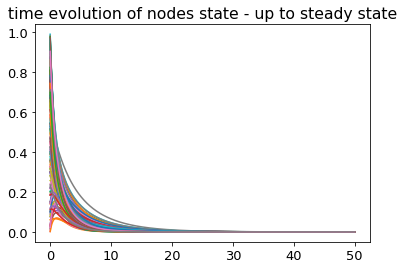

[1, 0.1]
Normalizing jacobian - $\lambda_{max}=$1.497393863562797
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


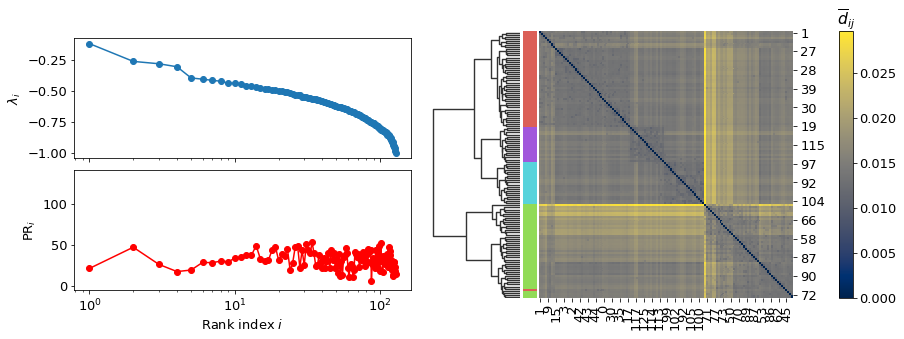

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.05]


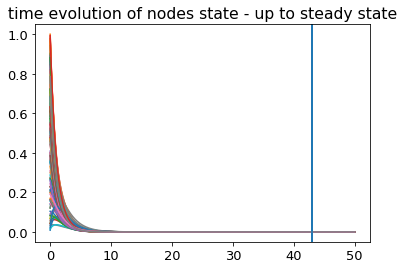

[1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.248692944886642
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


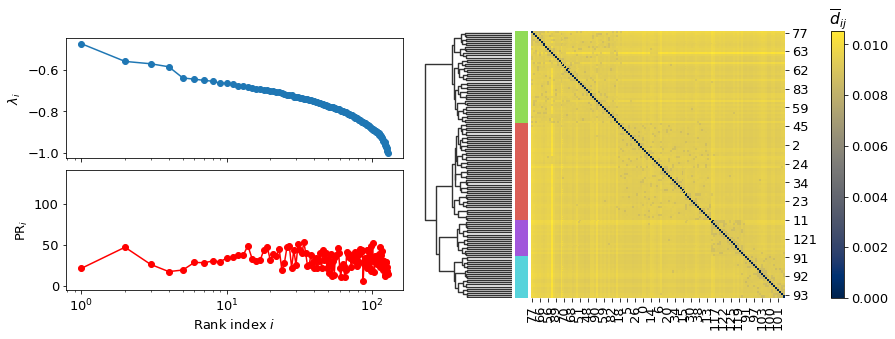

In [156]:
params = [1, 0.5, 0.1, 0.05]
params = [[1,i] for i in params]

for param in params:
    res = distance.jacobian_distance(lfr, 'Epidemics', norm=True, args=param, name=None, title=None, comms=comms)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 1]


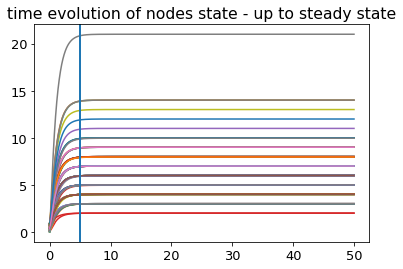

[1, 0, 1]
Normalizing jacobian - $\lambda_{max}=$1.0177562271139626
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


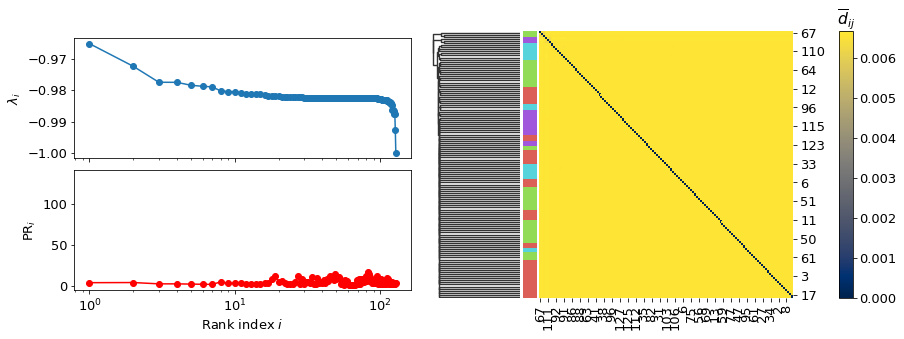

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.8]


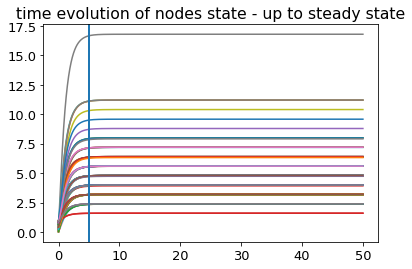

[1, 0, 0.8]
Normalizing jacobian - $\lambda_{max}=$1.048699500570932
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


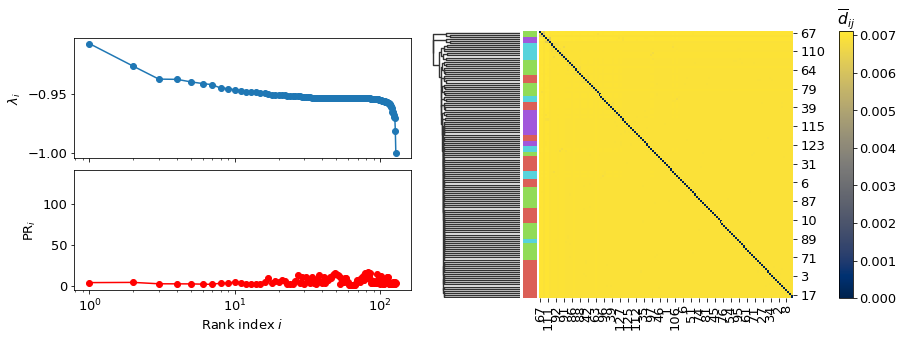

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.4]


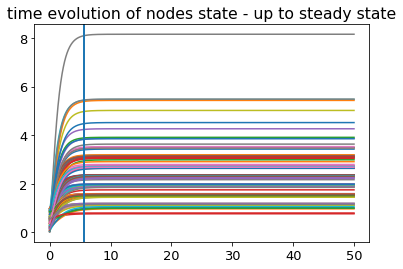

[1, 0, 0.4]
Normalizing jacobian - $\lambda_{max}=$1.3159658012282498
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


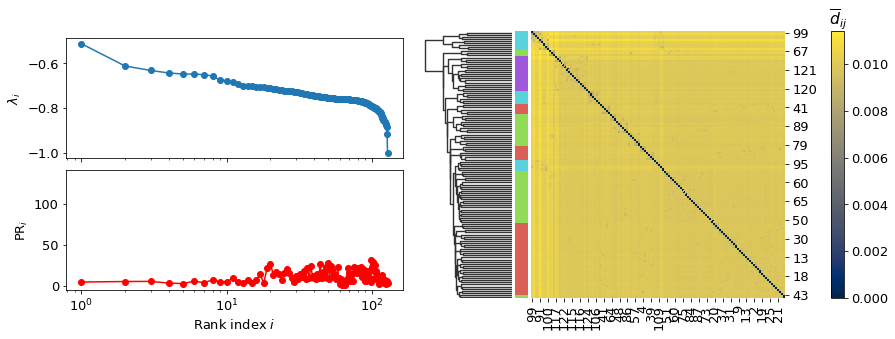

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.2]


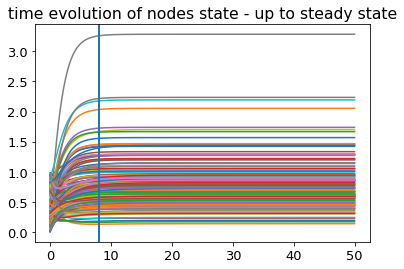

[1, 0, 0.2]
Normalizing jacobian - $\lambda_{max}=$1.5236795278528474
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


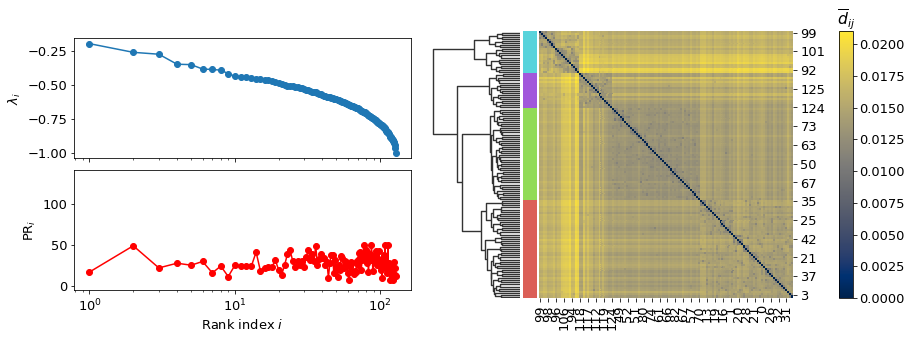

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.1]


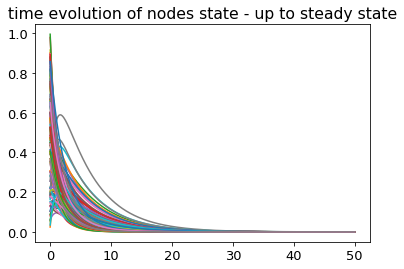

[1, 0, 0.1]
Normalizing jacobian - $\lambda_{max}=$1.497385886849536
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


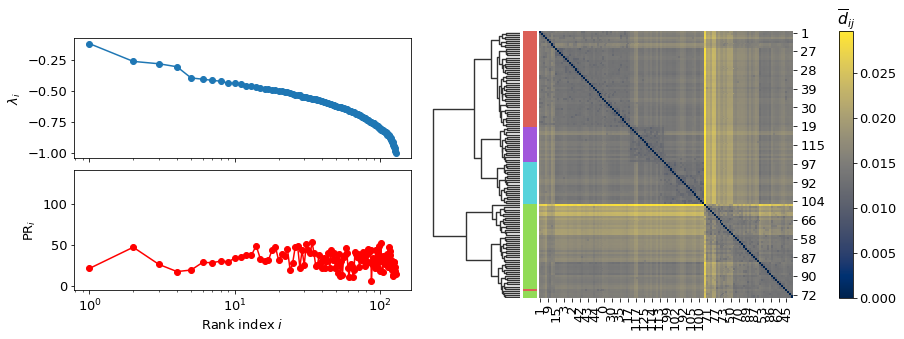

In [166]:
params = [1, 0.8, 0.4, 0.2, 0.1]
params = [[1,0,i] for i in params]

for param in params:
    res = distance.jacobian_distance(lfr, 'Neuronal', norm=True, args=param, name=None, title=None, comms=comms)

# What happens in the insensitive regime?

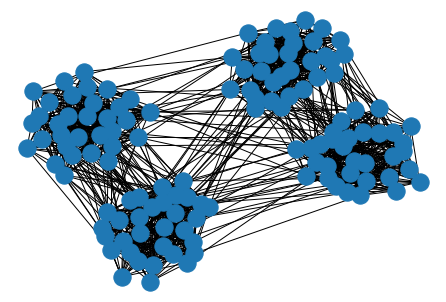

In [149]:
G = nx.from_numpy_array(adj)
nx.draw(G)

In [192]:
nx.degree_assortativity_coefficient(G)

-0.034522920890062425

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 2, 0.05]


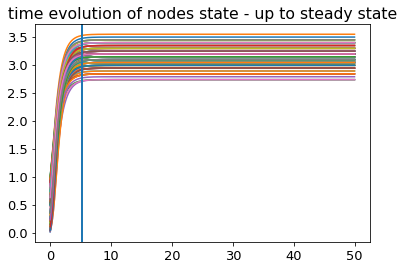

[1, 2, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9934644787438554
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


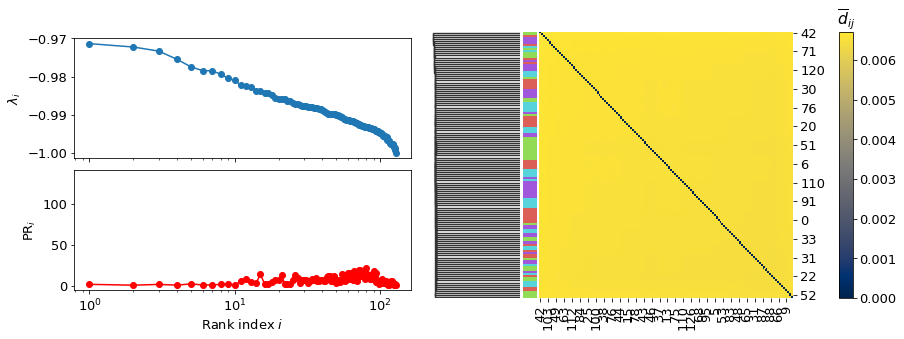

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


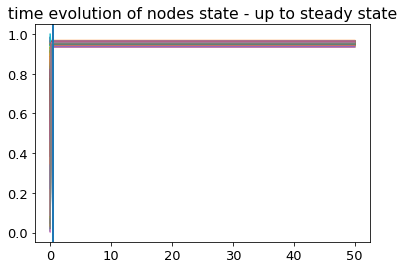

[1, 1]
Normalizing jacobian - $\lambda_{max}=$30.65239654676763
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


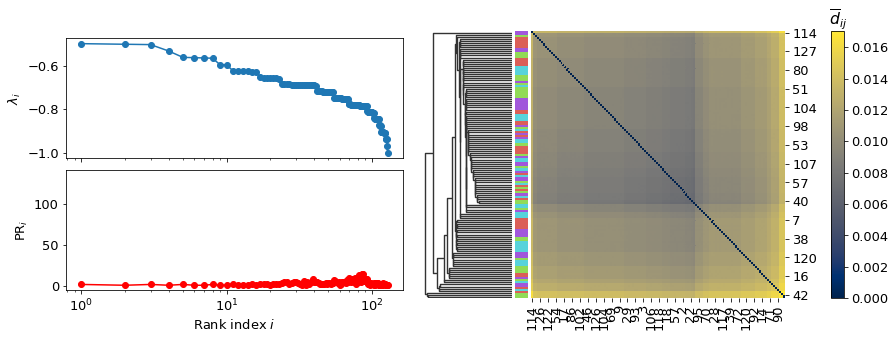

In [102]:
ress = []

### Neuronal
param = [1,2,0.05]
res = distance.jacobian_distance(adj, 'Neuronal', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))
ress.append(res)

### Epidemics
param = [1,1]
res = distance.jacobian_distance(adj, 'Epidemics', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))
ress.append(res)

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 5]


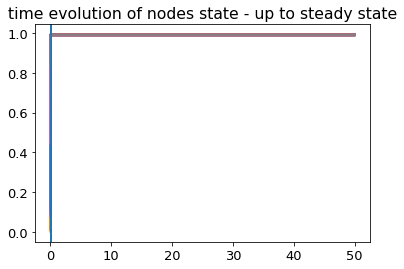

[1, 5]
Normalizing jacobian - $\lambda_{max}=$154.6454737034779
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


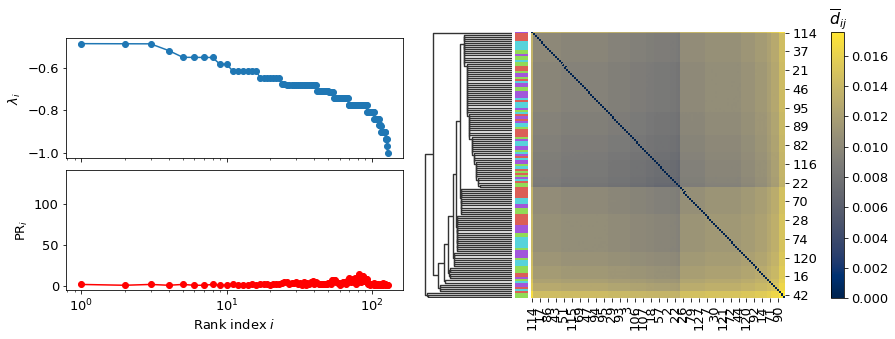

In [103]:
param = [1,5]
res = distance.jacobian_distance(adj, 'Epidemics', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))
ress.append(res)

JACOBIAN DISTANCE
Dynamics: Epidemics
[25, 1]


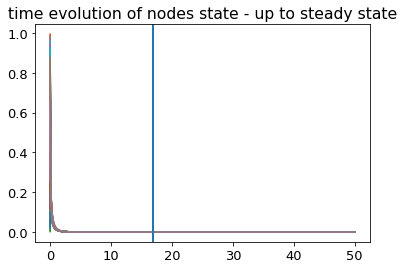

[25, 1]
Normalizing jacobian - $\lambda_{max}=$31.304387760817185
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


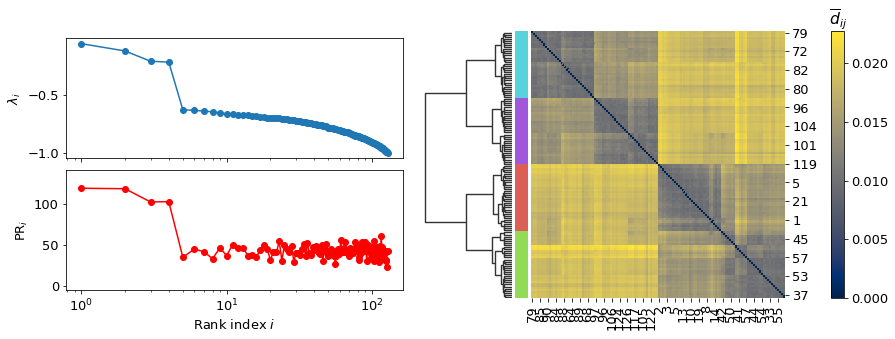

In [104]:
param = [25, 1]
res = distance.jacobian_distance(adj, 'Epidemics', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))
ress.append(res)

In [105]:
deg = np.sum(adj, axis=0)
Deg = deg * deg[:,None]

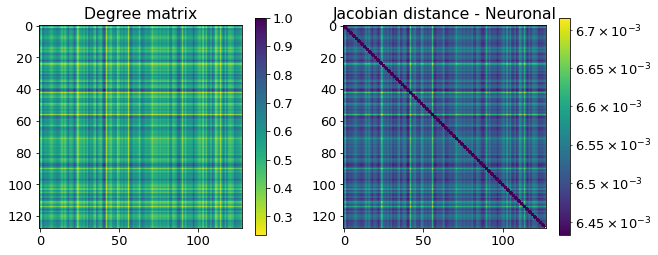

In [106]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(Deg/np.max(Deg), cmap='viridis_r')
plt.title('Degree matrix')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(ress[0][0], norm=LogNorm(np.min(ress[0][0][ress[0][0]>0]),np.max(ress[0][0])))
plt.title('Jacobian distance - Neuronal')
plt.colorbar()
plt.show()

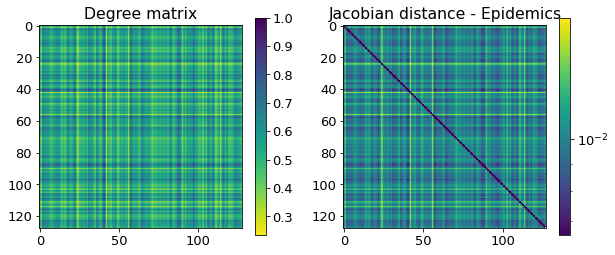

In [107]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(Deg/np.max(Deg), cmap='viridis_r')
plt.title('Degree matrix')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(ress[1][0], norm=LogNorm(np.min(ress[1][0][ress[1][0]>0]),np.max(ress[1][0])))
plt.title('Jacobian distance - Epidemics')
plt.colorbar()
plt.show()

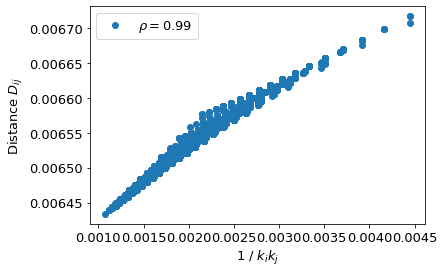

In [137]:
x1 = Deg#/np.max(Deg)
x1 = x1[np.triu_indices(N,1)]
#x1 = np.exp(-x1)

x2 = ress[0][0] #/ np.max(ress[0][0])
x2 = x2[np.triu_indices(N,1)]

rho = np.corrcoef(1/x1,x2)[0,1]

plt.plot(1/x1, x2, 'o', label=r'$\rho=$'+f'{np.round(rho,2)}')
plt.xlabel(r'1 / $k_ik_j$')
plt.ylabel(r'Distance $D_{ij}$')
plt.legend()
plt.show()

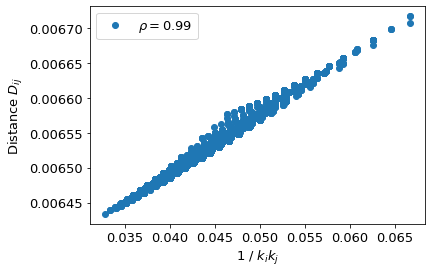

In [139]:
x1 = np.sqrt(deg * deg[:,None])
x1 = x1[np.triu_indices(N,1)]
#x1 = np.exp(-x1)

x2 = ress[0][0] #/ np.max(ress[0][0])
x2 = x2[np.triu_indices(N,1)]

rho = np.corrcoef(1/x1,x2)[0,1]

plt.plot(1/x1, x2, 'o', label=r'$\rho=$'+f'{np.round(rho,2)}')
plt.xlabel(r'1 / $k_ik_j$')
plt.ylabel(r'Distance $D_{ij}$')
plt.legend()
plt.show()

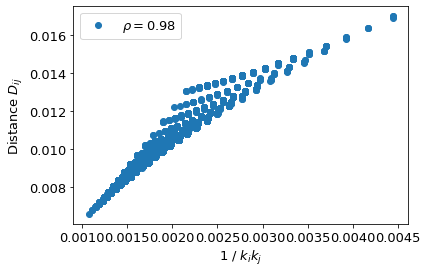

In [109]:
x1 = Deg#/np.max(Deg)
x1 = x1[np.triu_indices(N,1)]
#x1 = np.exp(-x1)

x2 = ress[1][0] #/ np.max(ress[0][0])
x2 = x2[np.triu_indices(N,1)]

rho = np.corrcoef(1/x1,x2)[0,1]

plt.plot(1/x1, x2, 'o', label=r'$\rho=$'+f'{np.round(rho,2)}')
plt.xlabel(r'1 / $k_ik_j$')
plt.ylabel(r'Distance $D_{ij}$')
plt.legend()
plt.show()

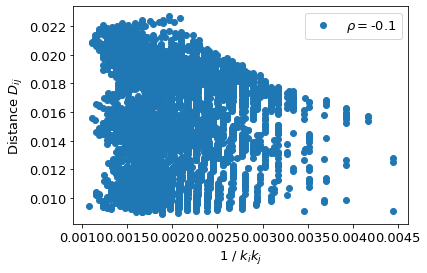

In [120]:
x1 = Deg#/np.max(Deg)
x1 = x1[np.triu_indices(N,1)]
#x1 = np.exp(-x1)

x2 = ress[-1][0]
x2 = x2[np.triu_indices(N,1)]

rho = np.corrcoef(1/x1,x2)[0,1]

plt.plot(1/x1, x2, 'o', label=r'$\rho=$'+f'{np.round(rho,2)}')
plt.xlabel(r'1 / $k_ik_j$')
plt.ylabel(r'Distance $D_{ij}$')
plt.legend()
plt.show()

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


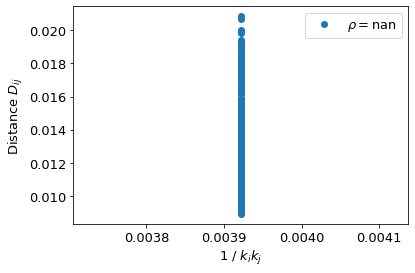

In [123]:
#x1 = Deg#/np.max(Deg)
x1 = -adj
x1 = x1[np.triu_indices(N,1)]
#x1 = np.exp(-x1)

x2 = ress[-1][0]
x2 = x2[np.triu_indices(N,1)]

rho = np.corrcoef(1/x1,x2)[0,1]

plt.plot(1/x1, x2, 'o', label=r'$\rho=$'+f'{np.round(rho,2)}')
plt.xlabel(r'1 / $k_ik_j$')
plt.ylabel(r'Distance $D_{ij}$')
plt.legend()
plt.show()

# Comparison all dynamics

In [140]:
er = nx.erdos_renyi_graph(N, p=0.1)
er = nx.to_numpy_array(er)

In [ ]:
dynamics = ['Neuronal', 'Neuronal', 'Epidemics', 'Epidemics', 'NoisyVM', 'Population', ]

params = [[1,2,0.05],
          []]



res = distance.jacobian_distance(adj, 'Neuronal', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))
ress.append(res)

### Epidemics
param = [1,1]
res = distance.jacobian_distance(adj, 'Epidemics', norm=True, args=param, name=None, title=None, comms=np.repeat(np.arange(4),N//4))
ress.append(res)

for i, dynamic in dynamics:
    res = distance.jacobian_distance(adj, dynamic, norm=True, args=param, name=None, title=dynamic)

# Assortative, disassortative networks